In [38]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv')

In [39]:
df['Date']=pd.to_datetime(df['Date'], format="mixed")

In [40]:
df1=df[(df['Date']>='2023/04/01')&(df['Date']<='2024/04/30')]

In [41]:
df1=df1.sort_values(by='Date')

In [42]:
df1=df1.drop(columns=['Paper Ticket'])

In [51]:
import matplotlib.pyplot as plt

In [50]:
df1.set_index('Date', inplace=True)

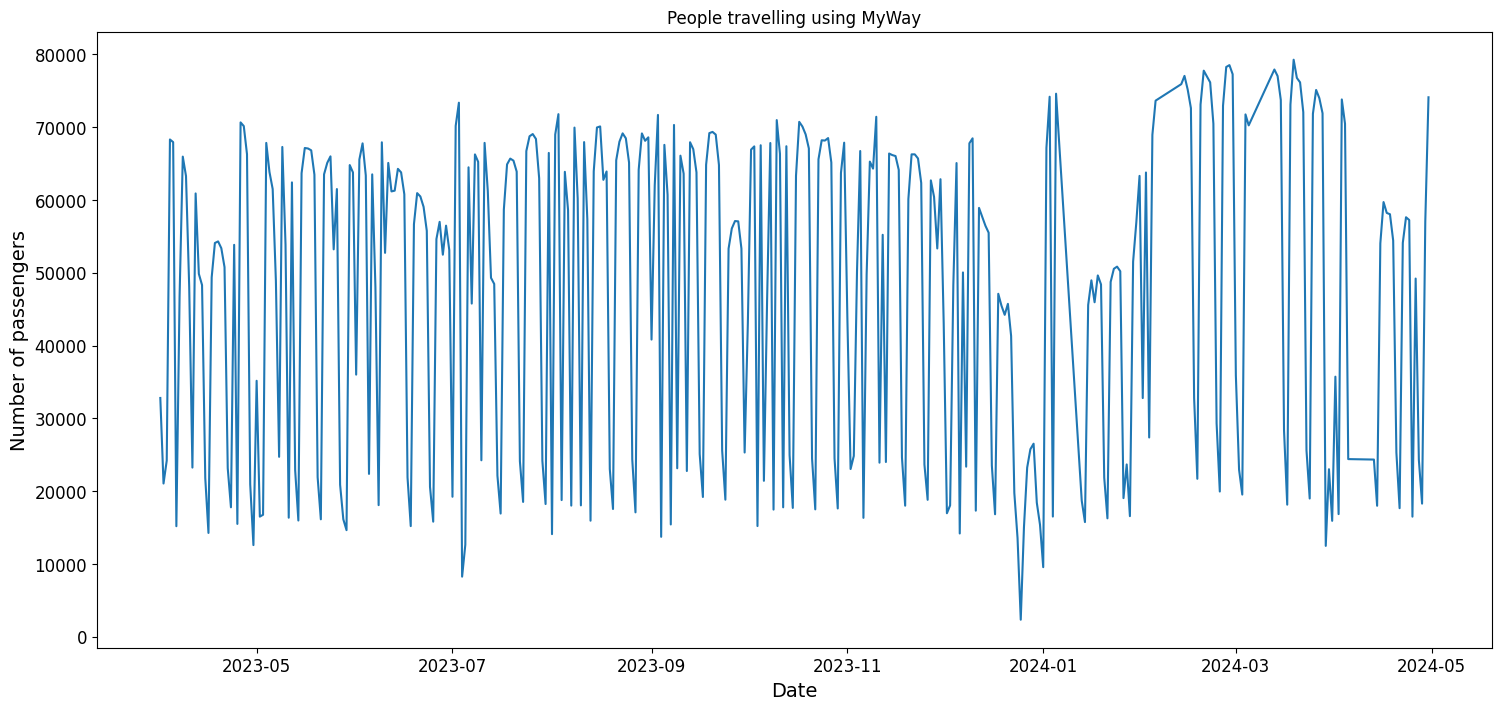

In [53]:
plt.plot(df1['MyWay'])
plt.title('People travelling using MyWay')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df1['MyWay'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.410611
p-value: 0.000284


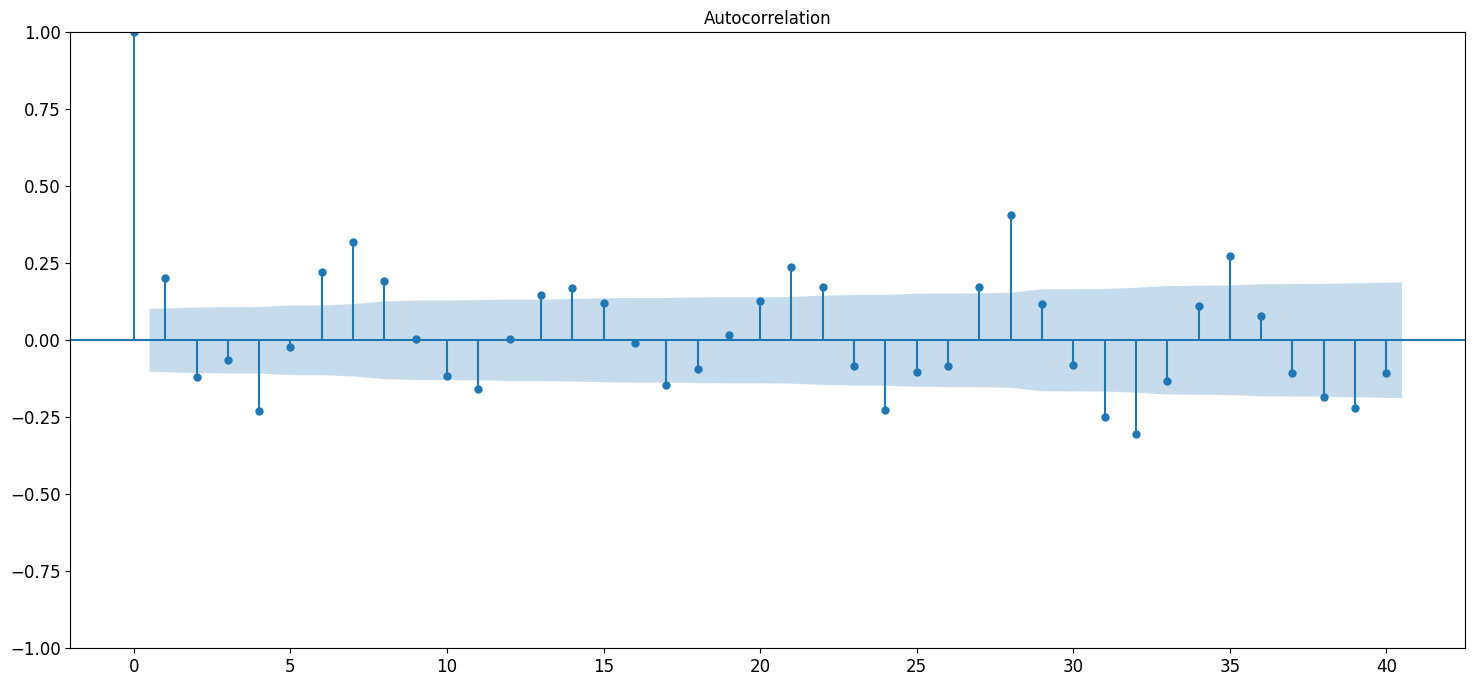

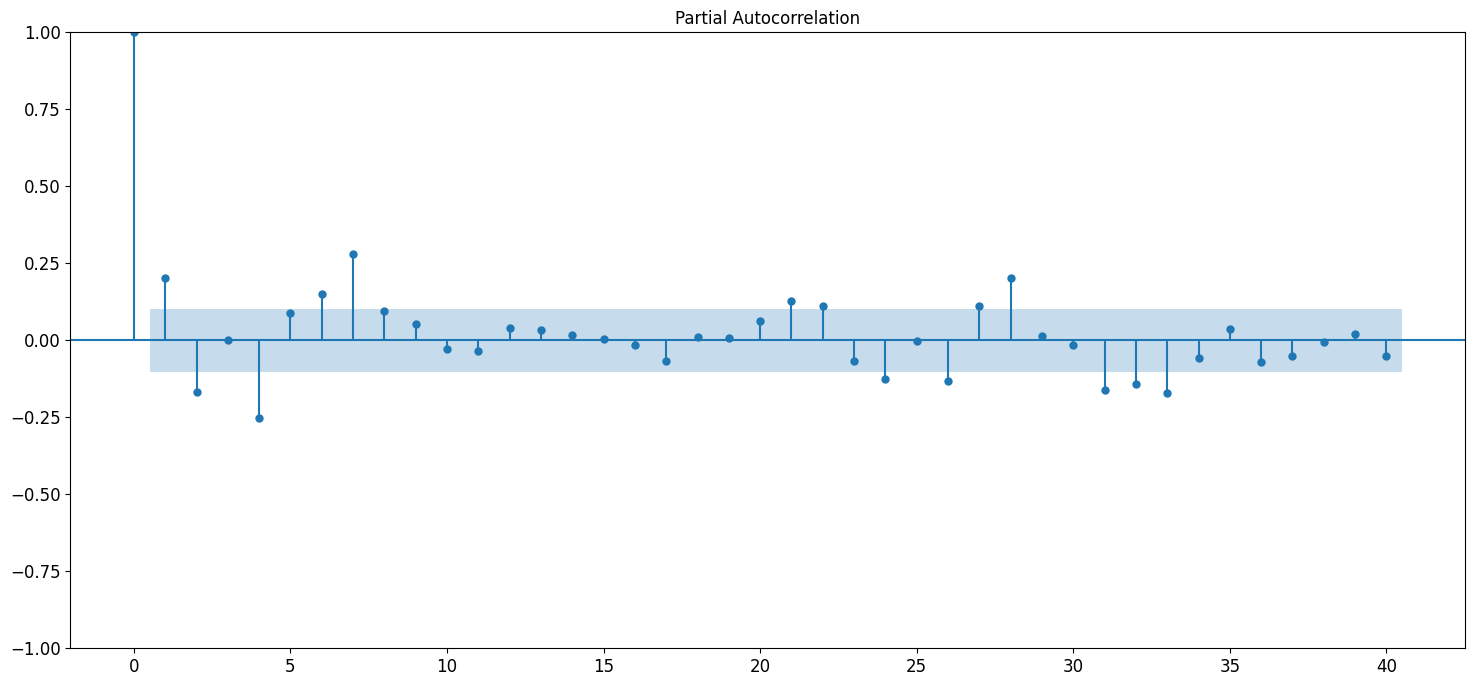

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1['MyWay'], lags=40)
plot_pacf(df1['MyWay'], lags=40)
plt.show()

In [56]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['MyWay'], order=(1, 0, 1))
model_fit = model.fit()

In [86]:
forecast = model_fit.get_forecast(steps=5)

In [90]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(df1) * 0.8)
train, test = df1[0:train_size], df1[train_size:len(df1)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(df1['MyWay'], order=(1,0,1))
model_train_fit = model_train.fit()



In [85]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_aic = float('inf')
best_order = None

for param in pdq:
    try:
        model = ARIMA(train['MyWay'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except:
        continue

print('Best AIC:', best_aic)
print('Best Order:', best_order)


Best AIC: 6649.940857582382
Best Order: (2, 1, 2)


In [61]:
test

,MyWay
Date,
2024-01-27,23677
2024-01-28,16573
2024-01-29,51542
2024-01-30,56955
2024-01-31,63321
...,...
2024-04-26,49214
2024-04-27,24302
2024-04-28,18294


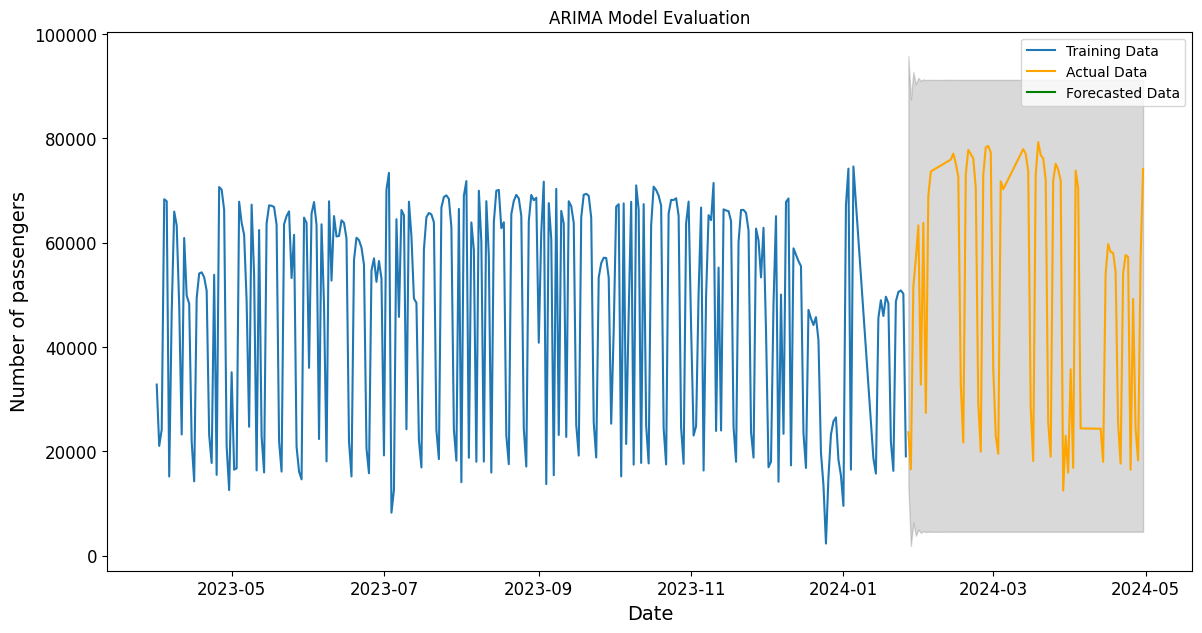

In [91]:
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['MyWay'], label='Training Data')
plt.plot(test['MyWay'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

In [77]:

# Convert the forecasted values to a DataFrame
forecast_data = pd.DataFrame(test_forecast_series, columns=['Forecasted Data'])

# Set the index to the corresponding date range


# Print the forecasted data DataFrame
print(test_forecast_series)

2024-05-01   NaN
2024-05-02   NaN
2024-05-03   NaN
2024-05-04   NaN
2024-05-05   NaN
2024-05-06   NaN
2024-05-07   NaN
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
RMSE:  6.970853456222879